In [2]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = torch.randn(100, 3)
# Create some noisey target data
target = data.sum(1, keepdims=True) + 0.01*torch.randn(data.shape[0], 1)

linear = nn.Linear(3, 1) 
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01) 

target_pred = linear(data)

Text(0, 0.5, 'Ouputs')

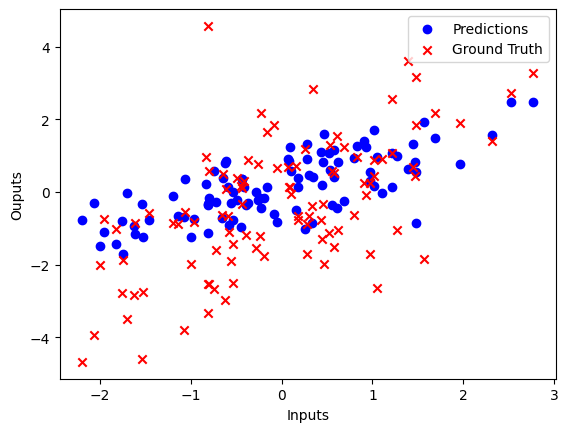

In [ ]:
# Plotting the first dimension of the input vs the output
plt.scatter(data[:, 0], target_pred.detach(), color="blue")
plt.scatter(data[:, 0], target, marker="x", color="red")
plt.legend(["Predictions", "Ground Truth"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")

In [5]:
# Lets create an empty array to log the loss
loss_logger = []

# Lets perform 100 itterations of our dataset
for i in range(1000):
    # Perform a forward pass of our data
    target_pred = linear(data)
    
    # Calculate the loss
    loss = loss_function(target_pred, target)
    
    # .zero_grad sets the stored gradients to 0
    # If we didn't do this they would be added to the 
    # Gradients from the previous step!
    optimizer.zero_grad()
    
    # Calculate the new gradients
    loss.backward()
    
    # Perform an optimization step!
    optimizer.step()

    loss_logger.append(loss.item())
    
print("loss:", loss.item())

loss: 8.294469444081187e-05


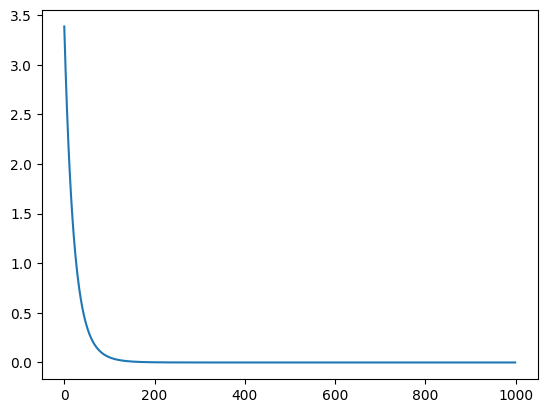

In [6]:
plt.plot(loss_logger)

Text(0, 0.5, 'Ouputs')

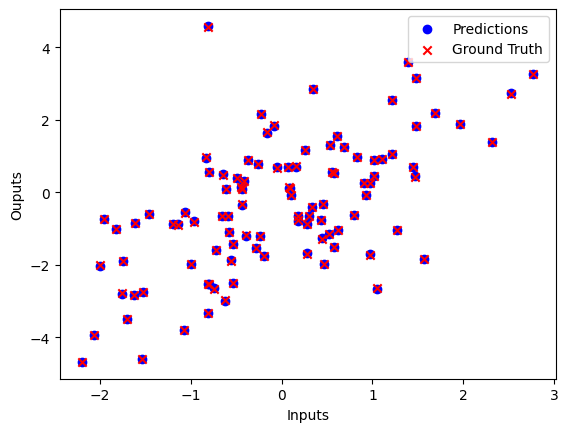

In [7]:
# Plotting the first dimension of the input vs the output
plt.scatter(data[:, 0], target_pred.detach(), color="blue")
plt.scatter(data[:, 0], target, marker="x", color="red")
plt.legend(["Predictions", "Ground Truth"])
plt.xlabel("Inputs")
plt.ylabel("Ouputs")

In [14]:
npzfile = np.load('data/toy_data_two_moon.npz')

train_X = torch.FloatTensor( npzfile['arr_0'])
train_y = torch.FloatTensor( npzfile['arr_2'])

test_X = torch.FloatTensor( npzfile['arr_1'])
test_y = torch.FloatTensor( npzfile['arr_3'])

Text(0.5, 1.0, 'Test Data')

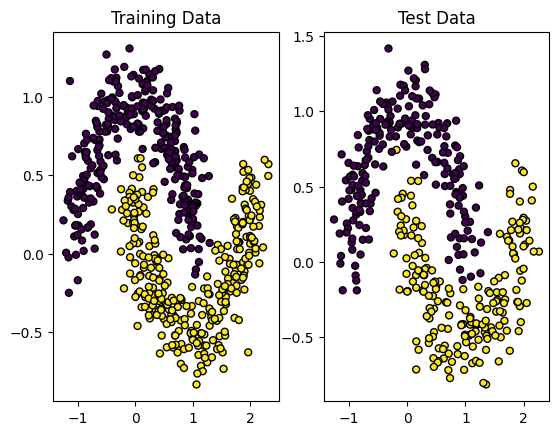

In [15]:
plt.subplot(121)
plt.scatter(train_X[:,0], train_X[:,1], c=train_y[:,0], marker='o', s=25, edgecolors='k')
plt.title('Training Data')
plt.subplot(122)
plt.scatter(test_X[:,0], test_X[:,1], c=test_y[:,0], marker='o', s=25, edgecolors='k')
plt.title('Test Data')

In [16]:
linear = nn.Linear(2, 1)
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [18]:
epochs = 1000

loss_logger = []
accuracy_logger = []

for i in range(epochs):
    with torch.no_grad():
        y_pred_hat = linear(test_X)
        class_pred = (y_pred_hat >= 0).float()
        accuracy_logger.append(float(sum(class_pred == test_y)) / float(test_y.shape[0]))

    y_train_hat = linear(train_X)
    loss = loss_function(y_train_hat, train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_logger.append(loss.item())

    if i % 100 == 0:
        print(f"Accuracy: {accuracy_logger[-1]}, Loss: {loss_logger[-1]}")

print(f"Accuracy: {accuracy_logger[-1]}, Loss: {loss_logger[-1]}")

Accuracy: 0.64, Loss: 0.09079915285110474
Accuracy: 0.64, Loss: 0.090796560049057
Accuracy: 0.6375, Loss: 0.09079521149396896
Accuracy: 0.6375, Loss: 0.09079450368881226
Accuracy: 0.6375, Loss: 0.090794138610363
Accuracy: 0.6375, Loss: 0.09079393744468689
Accuracy: 0.6375, Loss: 0.09079384803771973
Accuracy: 0.6375, Loss: 0.09079378843307495
Accuracy: 0.6375, Loss: 0.09079375863075256
Accuracy: 0.6375, Loss: 0.09079375118017197
Accuracy: 0.6375, Loss: 0.09079373627901077


Text(0, 0.5, 'Accuracy')

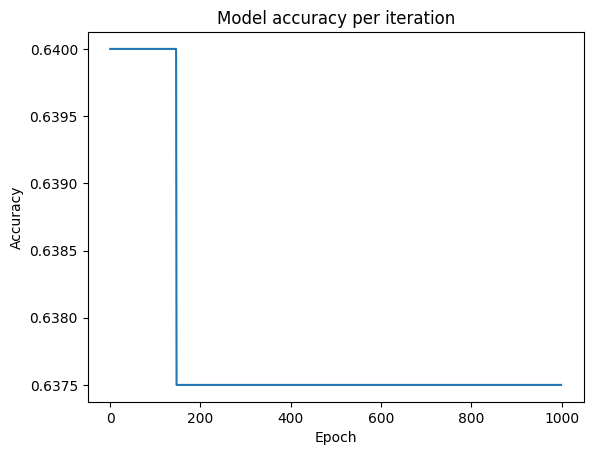

In [19]:
plt.plot(accuracy_logger)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

In [20]:
linear = nn.Linear(2, 1)
loss_function = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [21]:
epochs = 1000

loss_logger = []
accuracy_logger = []

for i in range(epochs):
    with torch.no_grad():
        y_pred_hat = linear(test_X)
        class_pred = (y_pred_hat >= 0).float()
        accuracy_logger.append(float(sum(class_pred == test_y)) / float(test_y.shape[0]))

    y_train_hat = linear(train_X)
    loss = loss_function(y_train_hat, train_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_logger.append(loss.item())

    if i % 100 == 0:
        print(f"Accuracy: {accuracy_logger[-1]}, Loss: {loss_logger[-1]}")

print(f"Accuracy: {accuracy_logger[-1]}, Loss: {loss_logger[-1]}")

Accuracy: 0.48, Loss: 0.7549462914466858
Accuracy: 0.5425, Loss: 0.6664460301399231
Accuracy: 0.705, Loss: 0.6014037728309631
Accuracy: 0.775, Loss: 0.5532479286193848
Accuracy: 0.795, Loss: 0.516892671585083
Accuracy: 0.81, Loss: 0.48876723647117615
Accuracy: 0.82, Loss: 0.46646347641944885
Accuracy: 0.825, Loss: 0.44836780428886414
Accuracy: 0.8275, Loss: 0.433386892080307
Accuracy: 0.8275, Loss: 0.42076489329338074
Accuracy: 0.835, Loss: 0.410068154335022


Text(0, 0.5, 'Accuracy')

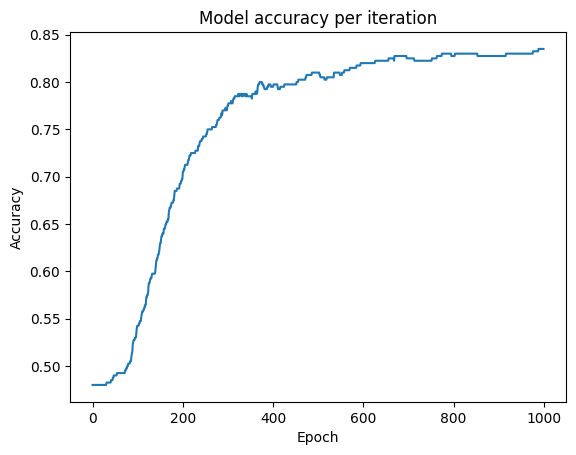

In [22]:
plt.plot(accuracy_logger)
plt.title("Model accuracy per iteration")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Text(0.5, 0, 'BCE Loss')

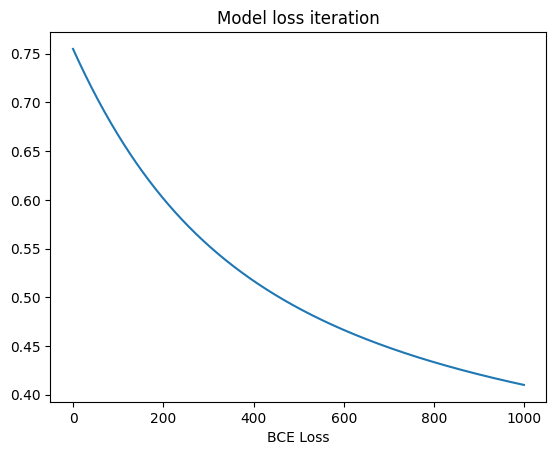

In [23]:
plt.plot(loss_logger)
plt.title("Model loss iteration")
plt.xlabel("Epoch")
plt.xlabel("BCE Loss")

In [67]:
def create_data(data_points):
    data_class1 = torch.rand(data_points, 2) * 1.45
    data_class2 = torch.rand(data_points, 2) * 3
    
    mask = ~((data_class2[:, 0] < 1.55) * (data_class2[:, 1] < 1.55))
    data_class2 = data_class2[mask]
    
    # Lables
    data_label1 = torch.zeros(data_class1.shape[0], 1)
    data_label2 = torch.ones(data_class2.shape[0], 1)

    # Combine data
    x_data = torch.cat((data_class1, data_class2), 0)
    y_data = torch.cat((data_label1, data_label2), 0)
    
    return x_data, y_data

In [68]:
train_X, train_y = create_data(1000)
test_X, test_y = create_data(500)

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

torch.Size([1723, 2]) torch.Size([1723, 1]) torch.Size([882, 2]) torch.Size([882, 1])


Text(0, 0.5, 'X1')

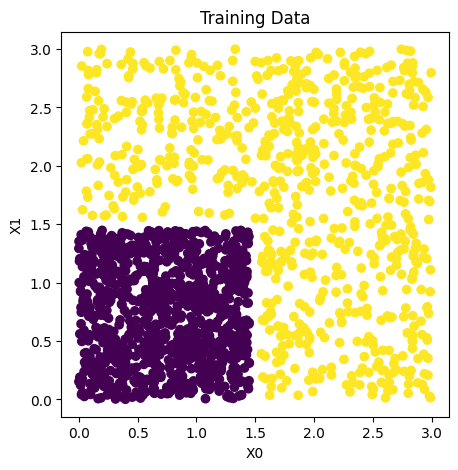

In [69]:
plt.figure(figsize=(5, 5))
plt.scatter(train_X[:, 0].numpy(), train_X[:, 1].numpy(), c=train_y.flatten().numpy())
plt.title("Training Data")
plt.xlabel("X0")
plt.ylabel("X1")

In [70]:
class NonLinearModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(NonLinearModel, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        self.h1 = self.linear1(x)
        self.h2 = torch.sigmoid(self.h1)
        self.h3 = self.linear2(self.h2)

        return self.h3


In [71]:
logistic_linear = NonLinearModel(input_size=2, output_size=1, hidden_size=2)
loss_function = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(logistic_linear.parameters(), lr=1e-2)

In [72]:
from tqdm.notebook import trange, tqdm
epochs = 5000

accuracy_logger = []
loss_logger = []

for i in trange(epochs, desc="Training Epochs"):
    with torch.no_grad():
        y_test_hat = logistic_linear(test_X)
        class_pred = (y_test_hat > 0).float()
        accuracy_logger.append(float(sum(class_pred == test_y)) / float(test_y.shape[0]))

    y_train_hat = logistic_linear(train_X)
    loss = loss_function(y_train_hat, train_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    loss_logger.append(loss.item())

    if i % 1000 == 0:
        print(f"Epoch {i}, loss: {loss.item()}", f"Accuracy: {accuracy_logger[-1]}")

print(f"Epoch {5000}, loss: {loss_logger[-1]}", f"Accuracy: {accuracy_logger[-1]}")

Training Epochs:   0%|          | 0/5000 [00:00<?, ?it/s]

Epoch 0, loss: 0.7108045816421509 Accuracy: 0.5668934240362812
Epoch 1000, loss: 0.17816796898841858 Accuracy: 0.9251700680272109
Epoch 2000, loss: 0.0492691695690155 Accuracy: 0.9875283446712018
Epoch 3000, loss: 0.018462831154465675 Accuracy: 0.9965986394557823
Epoch 4000, loss: 0.009200578555464745 Accuracy: 0.9977324263038548
Epoch 5000, loss: 0.004925754386931658 Accuracy: 0.9988662131519275


Text(0, 0.5, 'BCE Loss')

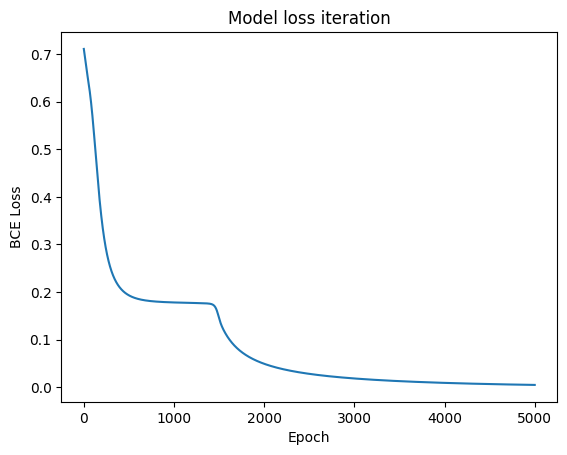

In [73]:
plt.plot(loss_logger)
plt.title("Model loss iteration")
plt.xlabel("Epoch")
plt.ylabel("BCE Loss")

Text(0, 0.5, 'Accuracy')

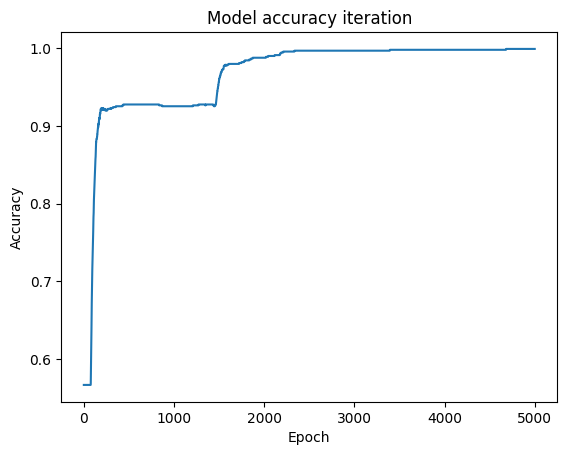

In [74]:
plt.plot(accuracy_logger)
plt.title("Model accuracy iteration")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")